In [85]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
#https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

In [87]:
spine_data = pd.read_csv('Dataset_spine.csv',
                        skiprows=1,
                        names=['pelvic_incidence',
                              'pelvic tilt',
                              'lumbar_lordosis_angle',
                              'sacral_slope',
                              'pelvic_radius',
                              'degree_spondylolisthesis',
                              'pelvic_slope',
                              'direct_tilt',
                              'thoracic_slope',
                              'cervical_tilt',
                              'sacrum_angle',
                              'scoliosis_slope',
                              'class'])

In [88]:
spine_data = spine_data.sample(frac=1).reset_index(drop=True) 

In [89]:
spine_data.head(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,58.101935,14.837639,79.649838,43.264295,113.587655,50.237878,0.951361,33.9040,11.6354,12.20428,-22.326717,19.5797,Abnormal
1,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
2,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575,0.793169,19.5456,8.7779,16.40308,-35.287375,31.6243,Abnormal
3,57.286945,15.149350,64.000000,42.137595,116.735387,30.341203,0.431125,22.2530,17.6755,12.20726,-21.986137,23.1484,Abnormal
4,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,0.668563,24.2342,8.7164,7.96714,-15.682309,34.9060,Abnormal
5,35.877571,1.112374,43.457257,34.765197,126.923906,-1.632238,0.793121,10.7594,11.0116,7.92836,-5.852864,22.7358,Normal
6,67.804694,16.550662,43.256802,51.254033,119.685645,4.867540,0.036158,18.4894,15.4016,13.86568,-17.473008,39.3526,Normal
7,51.529358,13.517847,35.000000,38.011510,126.718516,13.928331,0.863545,33.2628,11.0870,12.42093,-15.259539,18.2936,Normal
8,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0.702208,24.7795,11.4937,10.80051,-30.625194,41.9010,Normal
9,85.352315,15.844910,71.668660,69.507405,124.419787,76.020603,0.046939,26.0497,11.7878,14.39722,-12.551344,39.8494,Abnormal


In [90]:
spine_data.shape

(310, 13)

In [91]:
spine_data[spine_data.isnull().any(axis=1)].count()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

In [92]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [93]:
from sklearn import preprocessing

In [94]:
label_encoding = preprocessing.LabelEncoder()
spine_data['class'] = label_encoding.fit_transform(spine_data['class'].astype(str))

In [95]:
spine_data.sample(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
93,44.253476,1.101087,38.000000,43.152390,98.274107,23.910635,0.180864,9.9710,12.4275,9.73836,-6.195062,25.5700,0
50,40.349296,10.194748,37.967747,30.154548,128.009927,0.458901,0.170983,12.8223,13.9897,10.31438,-30.255112,18.7992,1
7,51.529358,13.517847,35.000000,38.011510,126.718516,13.928331,0.863545,33.2628,11.0870,12.42093,-15.259539,18.2936,1
168,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549,0.354895,22.1191,9.3492,14.34981,-19.444964,40.8512,1
248,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,0.972006,10.5715,11.2339,13.29506,-12.139219,11.8487,0
252,54.752520,9.752520,48.000000,45.000000,123.037999,8.235294,0.385732,28.1386,14.9326,13.57371,-18.445718,13.8497,1
188,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,0.003220,13.3594,18.2659,15.38281,-2.504431,14.2555,0
167,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,0.623388,21.5013,13.0551,11.35399,-14.093301,20.8180,0
134,42.918041,-5.845994,58.000000,48.764035,121.606859,-3.362045,0.542971,12.4697,8.5981,9.07771,-27.627390,12.7281,1
46,50.819268,15.402213,42.528939,35.417055,112.192804,10.869566,0.678987,7.1103,7.2481,9.94785,-17.379206,14.7187,0


In [96]:
spine_data_corr = spine_data.corr()
spine_data_corr

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,-0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865
direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044


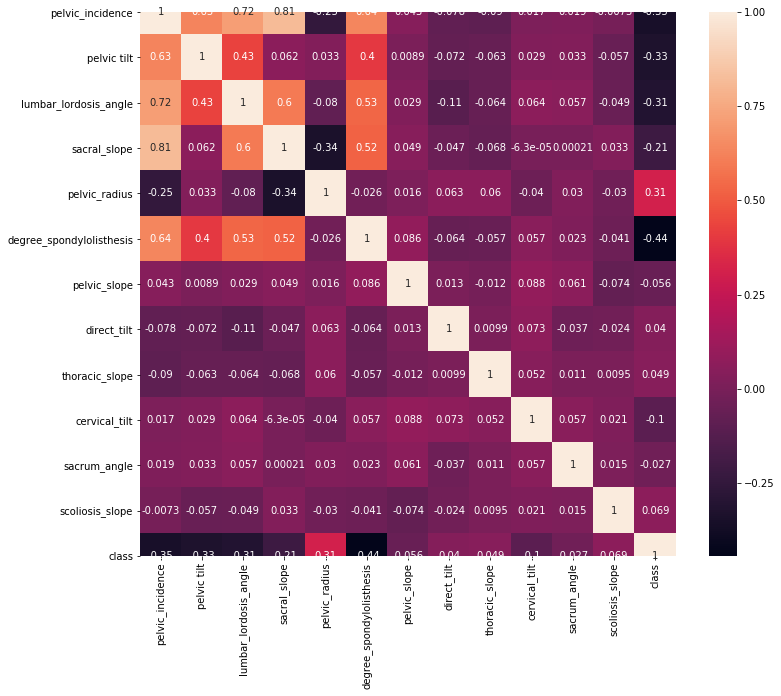

In [97]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(spine_data_corr, annot=True)

In [98]:
from sklearn.model_selection import train_test_split

X = spine_data.drop('class', axis=1)
Y = spine_data['class']

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.20)

In [99]:
x_train.shape, y_train.shape

((248, 12), (248,))

In [100]:
x_test.shape, y_test.shape

((62, 12), (62,))

In [101]:
from sklearn.neural_network import MLPClassifier

In [102]:
#activation=logistic
#mlp_clf = MLPClassifier(hidden_layer_sizes=(10,),
#                       max_iter=100,
#                       activation='relu',
#                       alpha=0.0001,
#                       solver='lbfgs',
#                       verbose=True)


mlp_clf = MLPClassifier(hidden_layer_sizes=(100,100),
                       max_iter=1000,
                       activation='logistic',
                       alpha=0.001,
                       solver='lbfgs',
                       verbose=True)

In [103]:
mlp_clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [104]:
y_pred = mlp_clf.predict(x_test)

In [105]:
pred_results = pd.DataFrame({'y_test':y_test,
                            'y_pred':y_pred})
pred_results.sample(10)

,y_test,y_pred
81,0,0
255,0,0
187,0,0
292,1,1
172,1,1
180,1,1
196,0,1
154,0,0
234,0,0
84,1,1


In [106]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8225806451612904

In [107]:
spine_data_crosstab = pd.crosstab(pred_results.y_test,pred_results.y_pred)

spine_data_crosstab

y_pred,0,1
y_test,,
0,40,4
1,7,11


In [108]:
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
print(confusion_matrix(y_test, y_pred))

[[40  4]
 [ 7 11]]


In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        44
           1       0.73      0.61      0.67        18

    accuracy                           0.82        62
   macro avg       0.79      0.76      0.77        62
weighted avg       0.82      0.82      0.82        62

